## Homework 4
Justin Lau 7/19/20

Question 2 and 3 are on the pdf

## Imports

In [95]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Question 1 Part A

In [96]:
#Using defined functions from Homework 3 and lecture 9
def newton(x,y):
    points = []
    for z in y:
        points.append(z)
    for i in range(1,len(x)):
        #iterating backwards
        for j in np.arange(len(x) - 1, i - 1,-1): 
            points[j] = (points[j] - points[j-1])/(x[j] - x[j-i])  
    return points

def newton_interpolating(x,y,z):
    points = newton(x,y)
    p = points[len(x)-1] #finding the n-1 value
    for i in np.arange(len(x) - 2,-1,-1):
        p = points[i] + (z-x[i])*p
    return p

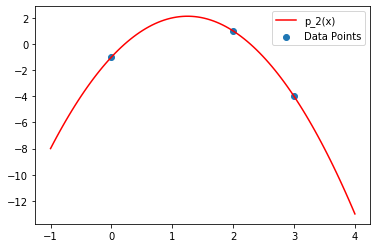

In [97]:
points = np.linspace(-1,4,100)

#Using the data from question 4 of the midterm to test the code
x = [0,2,3]
y = [-1,1,-4]
plt.scatter(x,y,label='Data Points')
plt.plot(points,newton_interpolating(x,y,points), 
         color='red',label='p_2(x)')
plt.legend()
plt.show()

## Part B

In [98]:
#creating 10 points between -1,1 for xj
xj = np.linspace(-1,1,11)
#creating 100 points between -1,1 for xj bar
xjbar = np.linspace(-1,1,101)

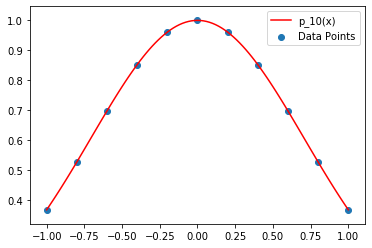

In [99]:
#Using the x^-x^2 function given to plot out points
plt.scatter(xj,np.exp(-xj**2),label='Data Points')
plt.plot(xjbar,newton_interpolating(xj,np.exp(-xj**2),xjbar)
         ,color='red',label='p_10(x)')
plt.legend()
plt.show()

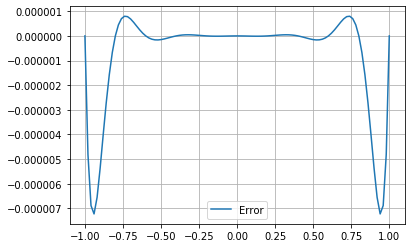

In [100]:
plt.plot(xjbar,np.exp(-xjbar**2)-newton_interpolating(xj,np.exp(-xj**2),xjbar)
         ,label='Error')
plt.grid()
plt.legend()
plt.show()

The error is extrememly low, but appears to be highest near the end points of the interval.

## Question 4

In [101]:
#Solving upper diagonal
def Upper_U(u,y):
    x = np.zeros(len(y))
    for i in range(len(y)-1,-1,-1):
        coefficient = [u[i][j]*x[j] for j in range(len(y)-1,i,-1)]
        x[i] = (y[i]-sum(coefficient))/u[i][i]
    return x

#Solving lower diagonal
def Lower_L(u,y):
    x = np.zeros(len(y))
    for i in range(len(y)):
        coefficient = [u[i][j]*x[j] for j in range(i)]
        x[i] = (y[i]-sum(coefficient))/u[i][i]
    return x

#Creating lower and upper diagnols using zero matrices that will be plugged into Upper_U and Lower_L
def tridiagonal(A,L,U):
    U[0][0] = A[0][0]
    L[-1][-1] = 1
    for j in range(len(A)-1):
        L[j][j] = 1
        U[j][j+1] = A[j][j+1]
        L[j+1][j] = A[j+1][j]/U[j][j]
        U[j+1][j+1] = A[j+1][j+1] - L[j+1][j]*A[j][j+1]

#Solves all values of z to be used to find the coefficients
def z_values(x,y):
    z0 = 0
    zn = 0
    h = [x[i]-x[i-1] for i in range(1,len(x))]
    m = []
    for i in range(len(x)-2):
        m.append(-6/h[i]*(y[i+1]-y[i]) + 6/h[i+1]*(y[i+2]-y[i+1]))
    A = np.zeros((len(x)-2,len(x)-2))
    a = len(A)
    for i in range(a):
        A[i][i] = 2*(h[i] + h[i+1])
        if (i > 0):
            A[i][i-1] = h[i] 
            A[i-1][i] = h[i]
    L = np.zeros((a,a))
    U = np.zeros((a,a))
    tridiagonal(A,L,U)
    u = Lower_L(L,m)
    z = Upper_U(U,u)
    return np.concatenate(([z0],z[0:],[zn]))

#Finds the values of each coefficient for the natural spline
def coefficients(x,y,X):
    z = z_values(x,y)
    j = 0
    #Using given values for each of the coefficients
    while(X >= x[j] and j < len(x) - 1): 
        j = j + 1
    j = j - 1
    h = (x[j+1]-x[j])
    A = 1/6/h*(z[j+1]-z[j])
    B = 1/2*z[j]
    C = 1/h*(y[j+1]-y[j]) - 1/6*h*(z[j+1]+2*z[j])
    D = y[j]
    return [A,B,C,D]

#Calculates S(x)
def natural(x,y,X):
    z = z_values(x,y)
    j = 0
    while(X >= x[j] and j < len(x)-1): 
        j = j+1
    j = j-1
    h = (x[j+1]-x[j])
    A = 1/6/h*(z[j+1]-z[j])
    B = 1/2*z[j]
    C = 1/h*(y[j+1]-y[j]) - 1/6*h*(z[j+1]+2*z[j])
    D = y[j]
    w = X-x[j]
    return A*w**3 + B*w**2 + C*w + D

## Question 5

In [102]:
#Given x and y values from the table
x = [1.5,0.9,0.6,0.35,0.20,0.10,0.50,1.,1.5]
y = [0.75,0.90,1.,0.8,0.45,0.2,0.1,0.2,0.25]

#using the tj function given to find each value of t for x and y.... t0 = 0
t = np.zeros(len(x))
for i in range(1,len(x)):
    t[i] = t[i-1] + math.sqrt((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2 )


In [103]:
Ax = [] 
Bx = [] 
Cx = [] 
Dx = [] 
Ay = []
By = []
Cy = []
Dy = []
#iterating throught the natural spline coefficients function to assing the coefficients to either A,B,C,D
for i in range(len(x)-1):
    xcoefficient = coefficients(t,x,t[i])
    ycoefficient = coefficients(t,y,t[i])
    Ax.append(xcoefficient[0])
    Bx.append(xcoefficient[1])
    Cx.append(xcoefficient[2])
    Dx.append(xcoefficient[3])
    Ay.append(ycoefficient[0])
    By.append(ycoefficient[1])
    Cy.append(ycoefficient[2])
    Dy.append(ycoefficient[3])
    
xdata = {'A_j': Ax, 'B_j': Bx, 'C_j': Cx, 'D_j': Dx}
ydata = {'A_j': Ay, 'B_j': By, 'C_j': Cy, 'D_j': Dy}
print('The coefficients for x:')
pd.DataFrame(xdata)


The coefficients for x:


,A_j,B_j,C_j,D_j
0,0.007105,0.000000,-0.972860,1.50
1,0.118550,0.013183,-0.964707,0.90
2,0.972763,0.125649,-0.920804,0.60
3,-1.767685,1.059958,-0.541225,0.35
4,5.377373,-0.959385,-0.502928,0.20
5,-3.383853,3.384321,0.150006,0.10
6,0.669721,-0.801273,1.215024,0.50
7,-0.148064,0.223203,0.920265,1.00


In [104]:
print('The coefficients for y: ')
pd.DataFrame(ydata)

The coefficients for y: 


,A_j,B_j,C_j,D_j
0,0.277387,0.000000,0.136435,0.75
1,-3.012600,0.514664,0.454737,0.90
2,2.430060,-2.343340,-0.123541,1.00
3,-0.267721,-0.009343,-0.876768,0.80
4,2.161791,-0.315179,-1.000342,0.45
5,-0.780564,1.431062,-0.699881,0.20
6,-0.474563,0.465557,0.082114,0.10
7,0.172729,-0.260385,0.186732,0.20


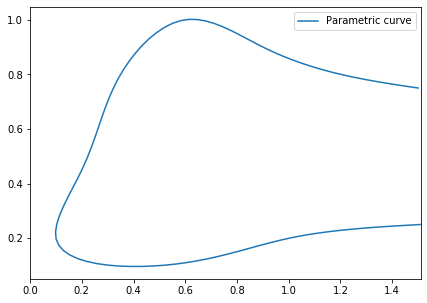

In [105]:
points = np.linspace(0,3.5,100)
x1 = []
y1 = []
for i in points:
    x1.append(natural(t,x,i))
    y1.append(natural(t,y,i))
plt.figure(figsize=(7,5))
plt.xlim(0,1.51)
plt.plot(x1,y1,label='Parametric curve')
plt.legend()
plt.show()